<h1 style="text-align:center"><strong>Price Elasticity of Demand</strong></h1>

<h2><strong>Problem Statement</strong></h2>


<pre><code>ABC Electronics is a company that produces and sells a variety of electronics goods, including speakers, laptops, and televisions. The company is facing a major challenge in managing their inventory. Despite their efforts to reduce costs and increase sales, they have noticed a decline in sales for a particular category of products. They believe that the decline in sales is due to a change in consumer behaviour, specifically in the way that consumers are responding to changes in price. In order to address this issue, ABC Electronics has asked us to perform a data science project on the Price Elasticity of Demand for their products. This project will be developed with stakeholder"s needs in mind and potentially deliver significant value to sales, marketing, and regulatory managers, by providing data-driven insights into consumer behaviour and product demand.</code></pre>


In [2]:
# IMPORTING PACKAGES
# ------------------------------------------------------
import pandas as pd
import numpy as np
import os
import re
import warnings

# VISUALIZATION
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline

# CONFIGURATIONS
# ------------------------------------------------------
warnings.filterwarnings("ignore")

<h2><strong>Data Gathering</strong></h2>


<pre><code>ABC Electronics has provided us with sales data for the past three years, including information on product categories, prices, and quantities sold.</code></pre>

In [3]:
#os.chdir("C:\\Users\\SkyLake\\Documents\\Python2.0\\01-ML-PEoD\\data")
os.chdir("data/")
raw_data = "G1-PriceElasticityOfDemand-FinalDataSetCombined.csv"

In [4]:
pwd

'C:\\Users\\SkyLake\\Documents\\Python2.0\\01-ML-PEoD\\data'

In [5]:
df = pd.read_csv(raw_data)

In [6]:
df.head(1)

id  prices.amountMax  prices.amountMin  \
0  AVphzgbJLJeJML43fA0o            104.99            104.99   

  prices.availability prices.condition prices.currency  \
0                 Yes              New             USD   

                                                                       prices.dateSeen  \
0  2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017-03-04T10:00:00Z,2017-03-03T14:00:00Z   

   prices.isSale prices.merchant prices.shipping  ...  \
0          False     Bestbuy.com             NaN  ...   

                                                                          name  \
0  Sanus VLF410B1 10-Inch Super Slim Full-Motion Mount for 37 - 84 Inches TV's   

   primaryCategories  \
0        Electronics   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              sourceURLs  \
0  https://www.amazon.com/Sanus-VLF410B1-10-Inch-Super-Full-Motion/dp/B00C78VIUE/,https://www.amazon.com/product-reviews/B00C78VIUE/,http://reviews.bestbuy.com/3545/5689019/reviews.htm?format=embedded&page=80,http://reviews.bestbuy.com/3545/5689019/reviews.htm?format=embedded,http://reviews.bestbuy.com/3545/5689019/reviews.htm?format=embedded&page=81,http://reviews.bestbuy.com/3545/5689019/reviews.htm?format=embedded&page=84,http://reviews.bestbuy.com/3545/5689019/reviews.htm?format=embedded&page=61,http://reviews.bestbuy.com/3545/5689019/reviews.htm?format=embedded&page=83,http://reviews.bestbuy.com/3545/5689019/reviews.htm?format=embedded&page=85,http://reviews.bestbuy.com/3545/5689019/reviews.htm?format=embedded&page=77,http://reviews.bestbuy.com/3545/5689019/reviews.htm?format=embedded&page=54,http://reviews.bestbuy.com/3545/5689019/reviews.htm?format=embedded&page=57,http://reviews.bestbuy.com/3545/5689019/reviews.htm?format=embedded&page=79,http://reviews.bestbuy.com/3545/5689019/reviews.htm?format=embedded&page=59,http://www.bhphotovideo.com/c/product/911749-REG/sanus_vlf410_b1_vlf410_super_slim_full_motion.html,http://www.amazon.com/Sanus-VLF410B1-10-Inch-Super-Full-Motion/dp/B00C78VIUE,http://www.bestbuy.com/site/sanus-tv-wall-mount-for-most-37-84-flat-panel-tvs-extends-10-3-8-black/5689019.p?skuId=5689019   

        upc       weight shipping Unnamed: 29 Unnamed: 30 Unnamed: 31  \
0  7.94E+11  32.8 pounds      NaN         NaN         NaN         NaN   

  Unnamed: 32  
0         NaN  

[1 rows x 33 columns]

In [7]:
# some general information 
print(f"Total number of rows : = {df.shape[0]}")
print(f"Total number of columns : = {df.shape[1]}")

Total number of rows : = 14592
Total number of columns : = 33


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14592 entries, 0 to 14591
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   14592 non-null  object 
 1   prices.amountMax     14592 non-null  float64
 2   prices.amountMin     14592 non-null  float64
 3   prices.availability  12667 non-null  object 
 4   prices.condition     13189 non-null  object 
 5   prices.currency      14592 non-null  object 
 6   prices.dateSeen      14592 non-null  object 
 7   prices.isSale        14592 non-null  bool   
 8   prices.merchant      13820 non-null  object 
 9   prices.shipping      8793 non-null   object 
 10  prices.sourceURLs    14592 non-null  object 
 11  Cluster              14592 non-null  int64  
 12  Category_name        14592 non-null  object 
 13  asins                14592 non-null  object 
 14  brand                14592 non-null  object 
 15  categories           14592 non-null 

<h2><strong>Data Cleaning/Preprocessing</strong></h2>

In [9]:
#Selecting only the columns we require 
df = df.drop(df.columns[-4:], axis=1)
#Removing unnecessary columns
df = df.drop(["primaryCategories","imageURLs","sourceURLs","ean","asins","upc","keys"],axis=1)

In [11]:
#Counting the total sales of product
def sales_date(x1):
    x1_list =x1.strip("'").split(",")
    return x1_list[0]

def sales_counter(x1):
    x1_list =x1.strip("'").split(",")
    x1_count = len(x1_list)
    return x1_count

df["Date"]= df["prices.dateSeen"].apply(sales_date)
df["Sale_num"]= df["prices.dateSeen"].apply(sales_counter)

In [12]:
df["prices.availability"].unique()

array(['Yes', 'In Stock', 'TRUE', 'undefined', 'yes', 'Out Of Stock',
       'Special Order', 'No', 'More on the Way', 'sold', 'FALSE',
       'Retired', '32 available', '7 available', nan, 'Limited Stock',
       'Discontinued', 'More Coming Soon'], dtype=object)

In [13]:
# Price availability is categorized
df["prices.availability"] = np.where(df["prices.availability"].str.contains("Yes|TRUE|In Stock|yes|available",case=False),"Yes",
                            np.where(df["prices.availability"].str.contains("Discontinued|Retired|FALSE|No|sold",case=False),"No",
                            np.where(df["prices.availability"].str.contains("Yes|In Stock",case=False),"Special",np.NaN)))

In [14]:
#Product condition categorization
df["prices.condition"] = np.where(df["prices.condition"].str.contains("new",case=False),"New",
                         np.where(df["prices.condition"].str.contains("refurbished",case=False),"Refurbished",
                         np.where(df["prices.condition"].str.contains("pre-owned|used",case=False),"Used",np.NaN)))

In [15]:
#Country where the products were sold
curr = df["prices.currency"].unique()
print(curr)
df["Country"]=np.where(df["prices.currency"].str.contains("USD"),"USA",
              np.where(df["prices.currency"].str.contains("CAD"),"Canada",
                np.where(df["prices.currency"].str.contains("SGD"),"Singapore",
                np.where(df["prices.currency"].str.contains("EUR"),"Europe",
                np.where(df["prices.currency"].str.contains("GBP"),"UK",np.NaN)))))

['USD' 'CAD' 'SGD' 'EUR' 'GBP']


In [16]:
#Seller Names
def merchant_name(x3):
    match = re.search(r"(?:www\.)([a-zA-Z]+)",str(x3))
    seller_nm = ""
    if match:
        seller_nm = match.group(1)
    return seller_nm
df["Merchant"]=df["prices.sourceURLs"].apply(merchant_name)

In [17]:
#Renaming Columns for ease of understanding
df = df.rename(columns={"prices.amountMax":"Actual_price",
                        "prices.amountMin":"Discount_price",
                        "prices.availability":"Product_availability",
                        "prices.condition":"Condition",
                        "prices.currency":"Currency",
                        "prices.isSale":"isSale",
                        "categories":"Description",
                        "brand":"Brand",
                        "name":"Name"})

In [18]:
#Selecting only the columns we require 
dff = df[["id","Actual_price","Discount_price","Product_availability","Condition","Currency","Country",
"Date","isSale","Merchant","Brand","Description","Category_name","Name","Sale_num"]]

In [19]:
#Percentage Discount
dff["Dis_percentage"] = round((((dff["Actual_price"]-dff["Discount_price"])/dff["Actual_price"])*100),2)

In [20]:
#Total Sales
dff["Total_sales"] = round((dff['Sale_num'] * dff['Discount_price']),2)

In [21]:
#Converting data to pd.datatime data type
dff['Date'] = pd.to_datetime(dff['Date'])

In [22]:
#Checking for Null Values
dff.isnull().sum()

id                      0
Actual_price            0
Discount_price          0
Product_availability    0
Condition               0
Currency                0
Country                 0
Date                    0
isSale                  0
Merchant                0
Brand                   0
Description             0
Category_name           0
Name                    0
Sale_num                0
Dis_percentage          0
Total_sales             0
dtype: int64

In [23]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14592 entries, 0 to 14591
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    14592 non-null  object             
 1   Actual_price          14592 non-null  float64            
 2   Discount_price        14592 non-null  float64            
 3   Product_availability  14592 non-null  object             
 4   Condition             14592 non-null  object             
 5   Currency              14592 non-null  object             
 6   Country               14592 non-null  object             
 7   Date                  14592 non-null  datetime64[ns, UTC]
 8   isSale                14592 non-null  bool               
 9   Merchant              14592 non-null  object             
 10  Brand                 14592 non-null  object             
 11  Description           14592 non-null  object             
 12  Cate

In [24]:
df=dff

In [25]:
#Exporing the Cleaning Data as CSV
#dff.to_csv("CleanedData.csv")

<h2><strong>Visualization</strong></h2>

<AxesSubplot:xlabel='Dis_percentage', ylabel='Sale_num'>

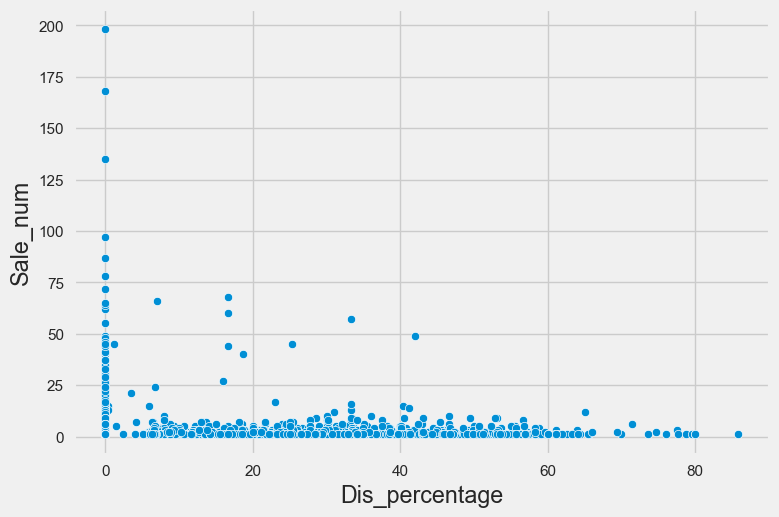

In [26]:
sns.scatterplot(x=df['Dis_percentage'], y=df['Sale_num'])


<AxesSubplot:xlabel='Condition', ylabel='count'>

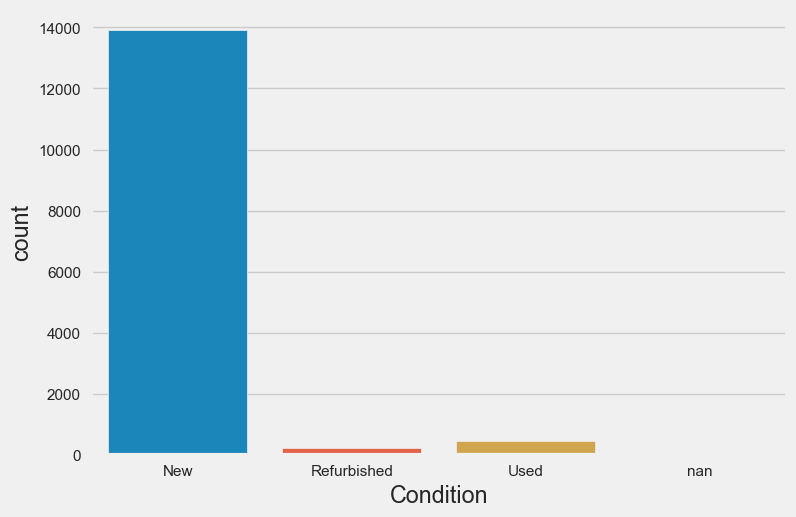

In [27]:
sns.countplot(df["Condition"])

<AxesSubplot:xlabel='Product_availability', ylabel='count'>

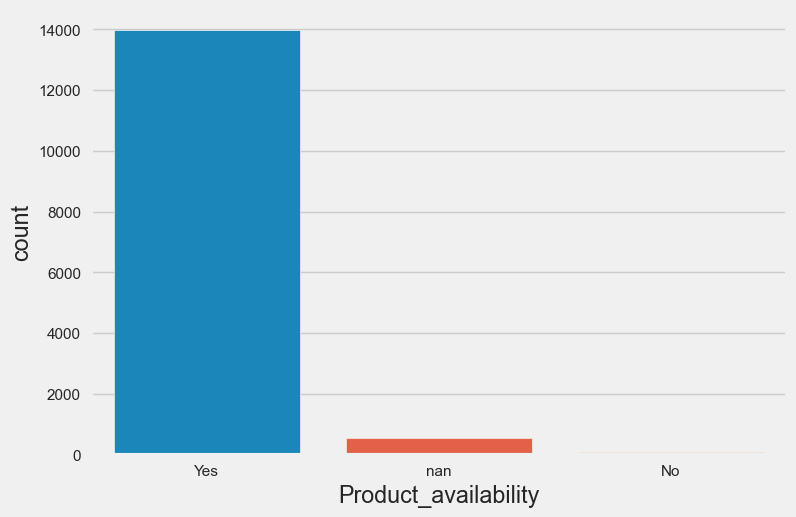

In [28]:
sns.countplot(df["Product_availability"])

Shape of your Data Set loaded: (14592, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    18 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
Number of All Scatter Plots = 10


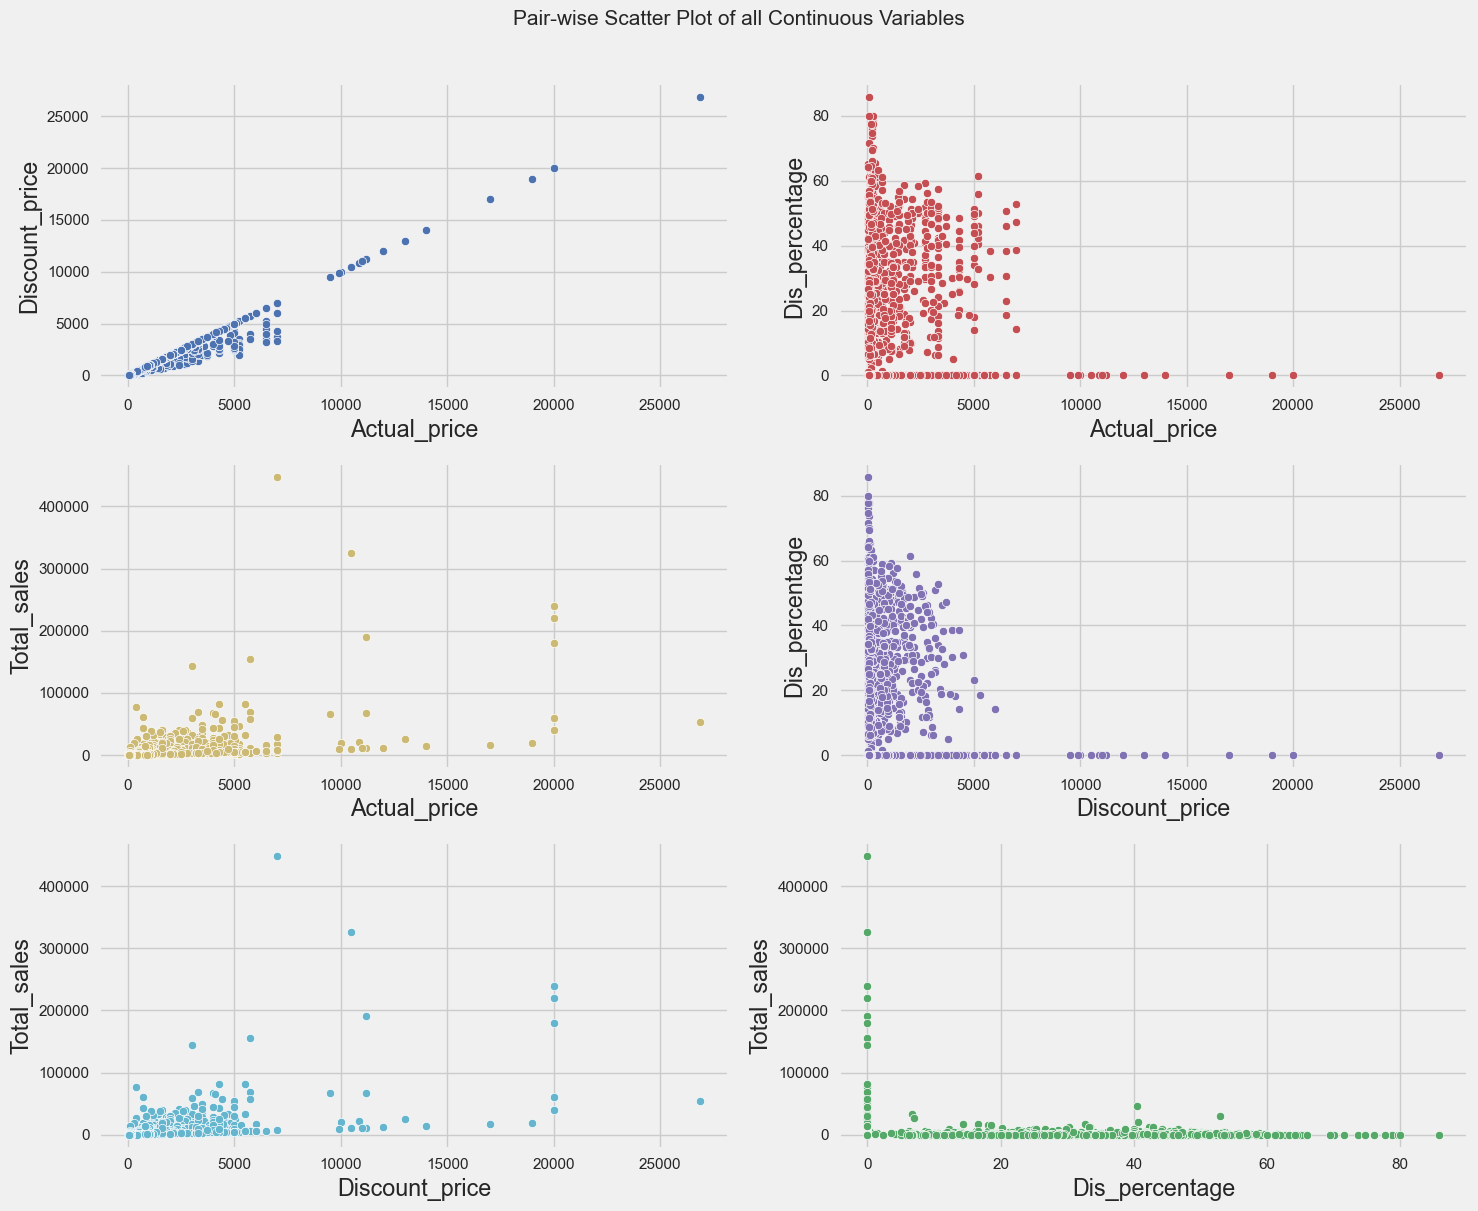

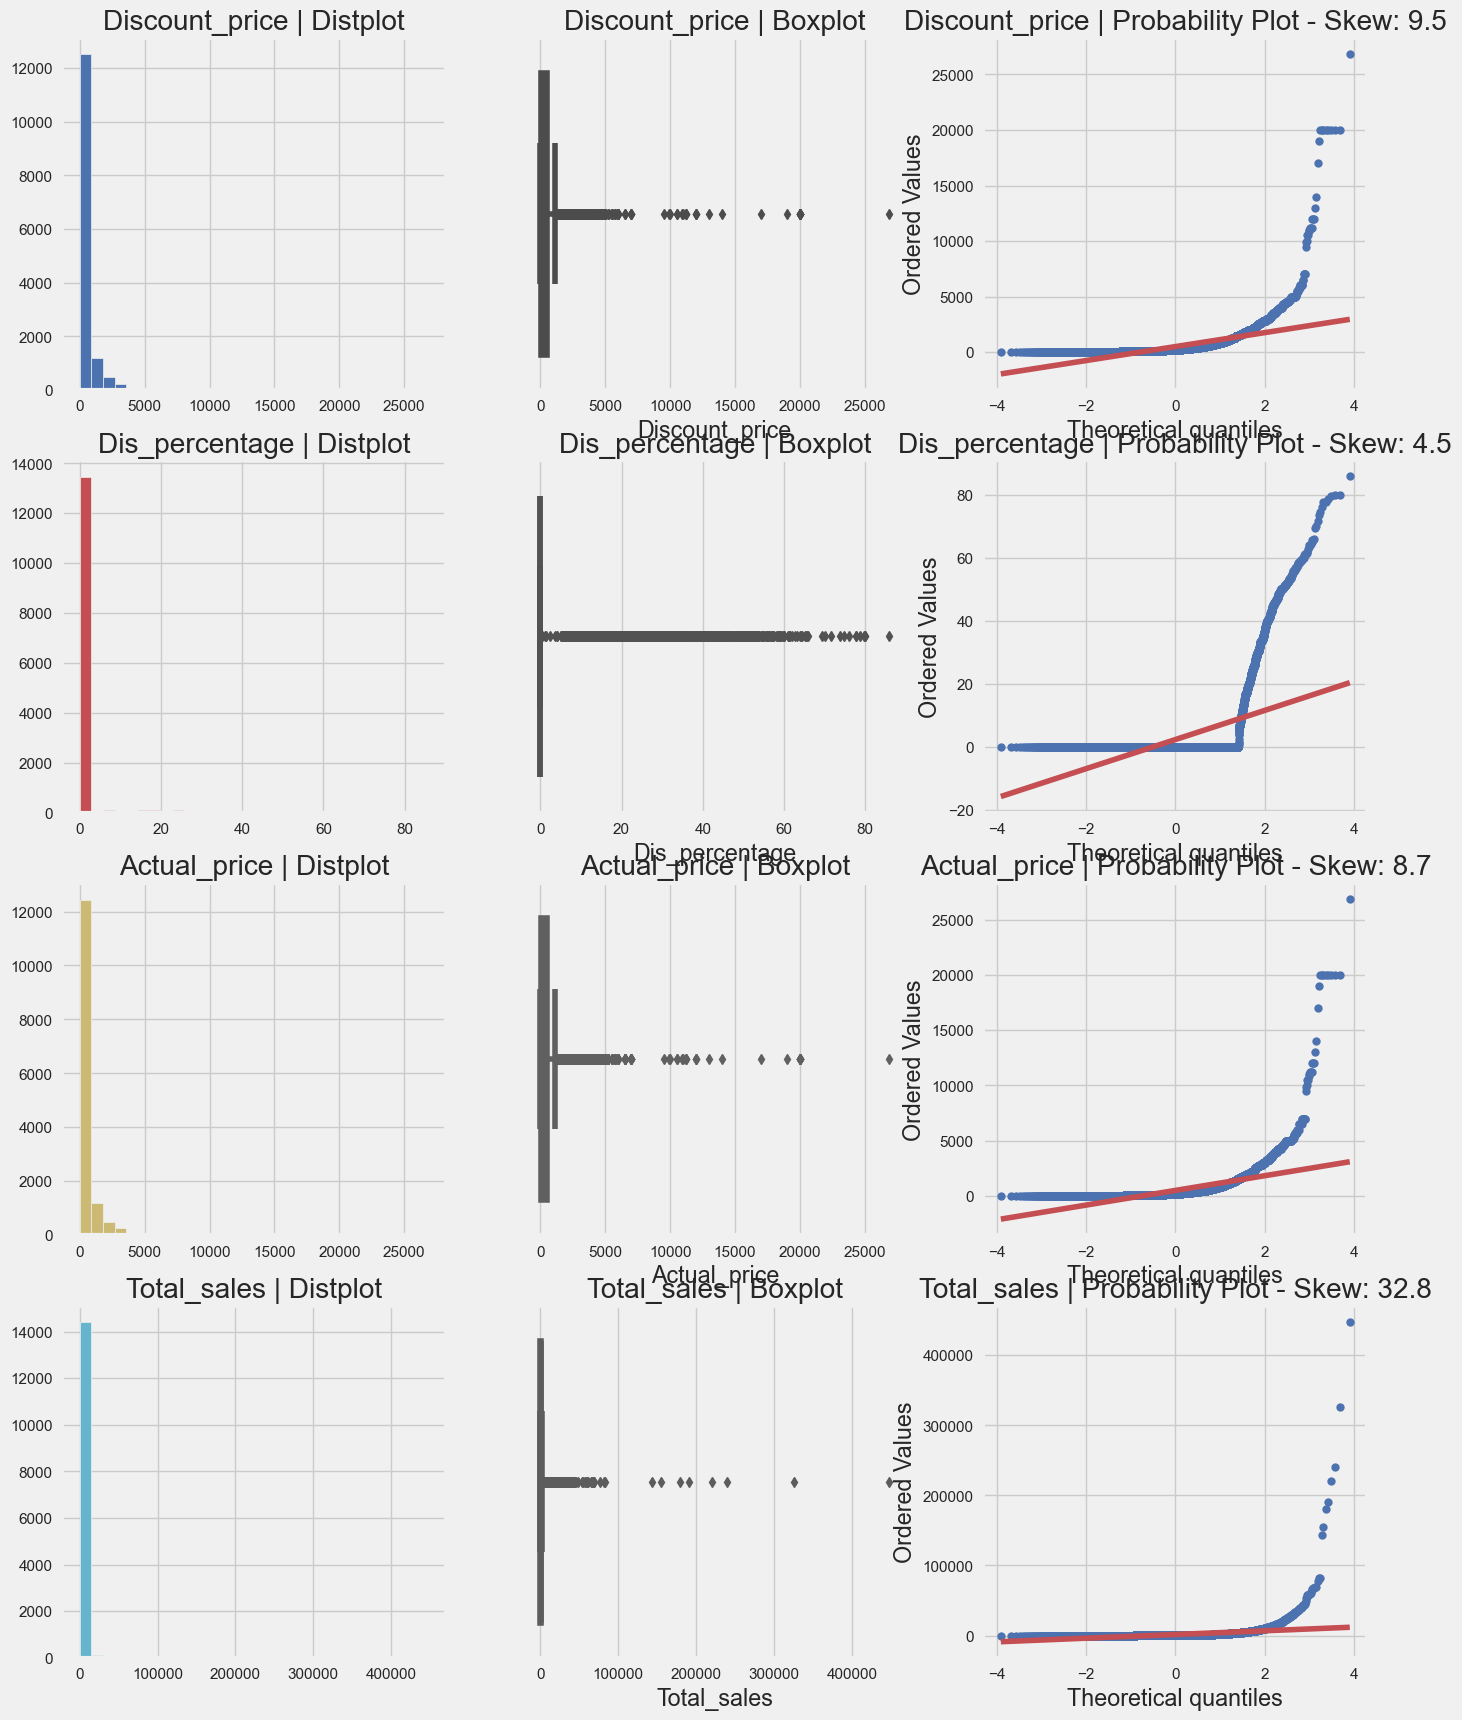

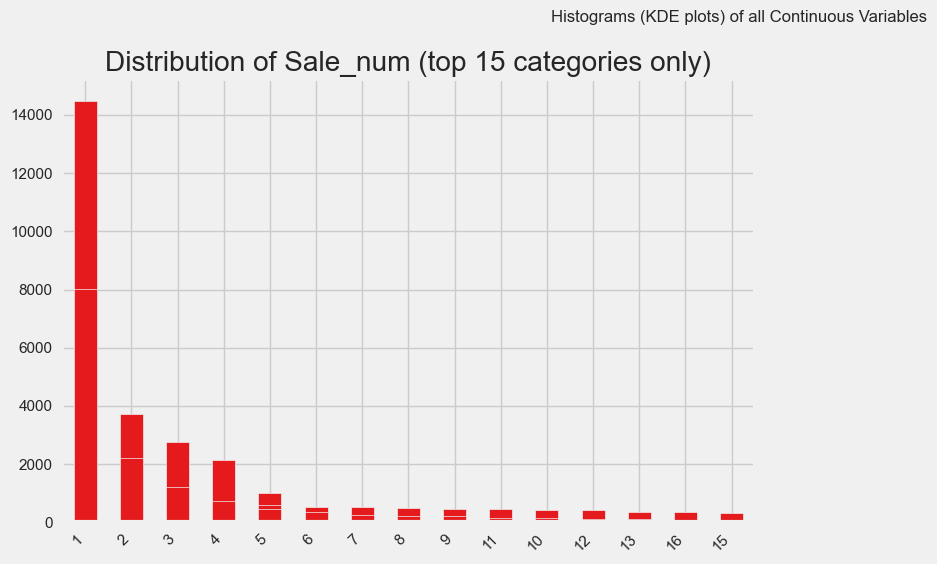

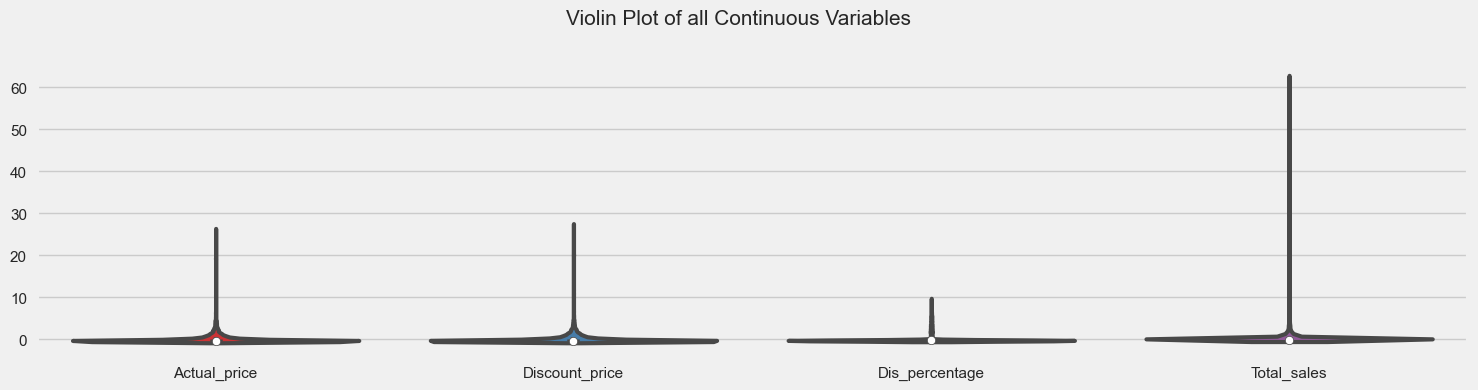

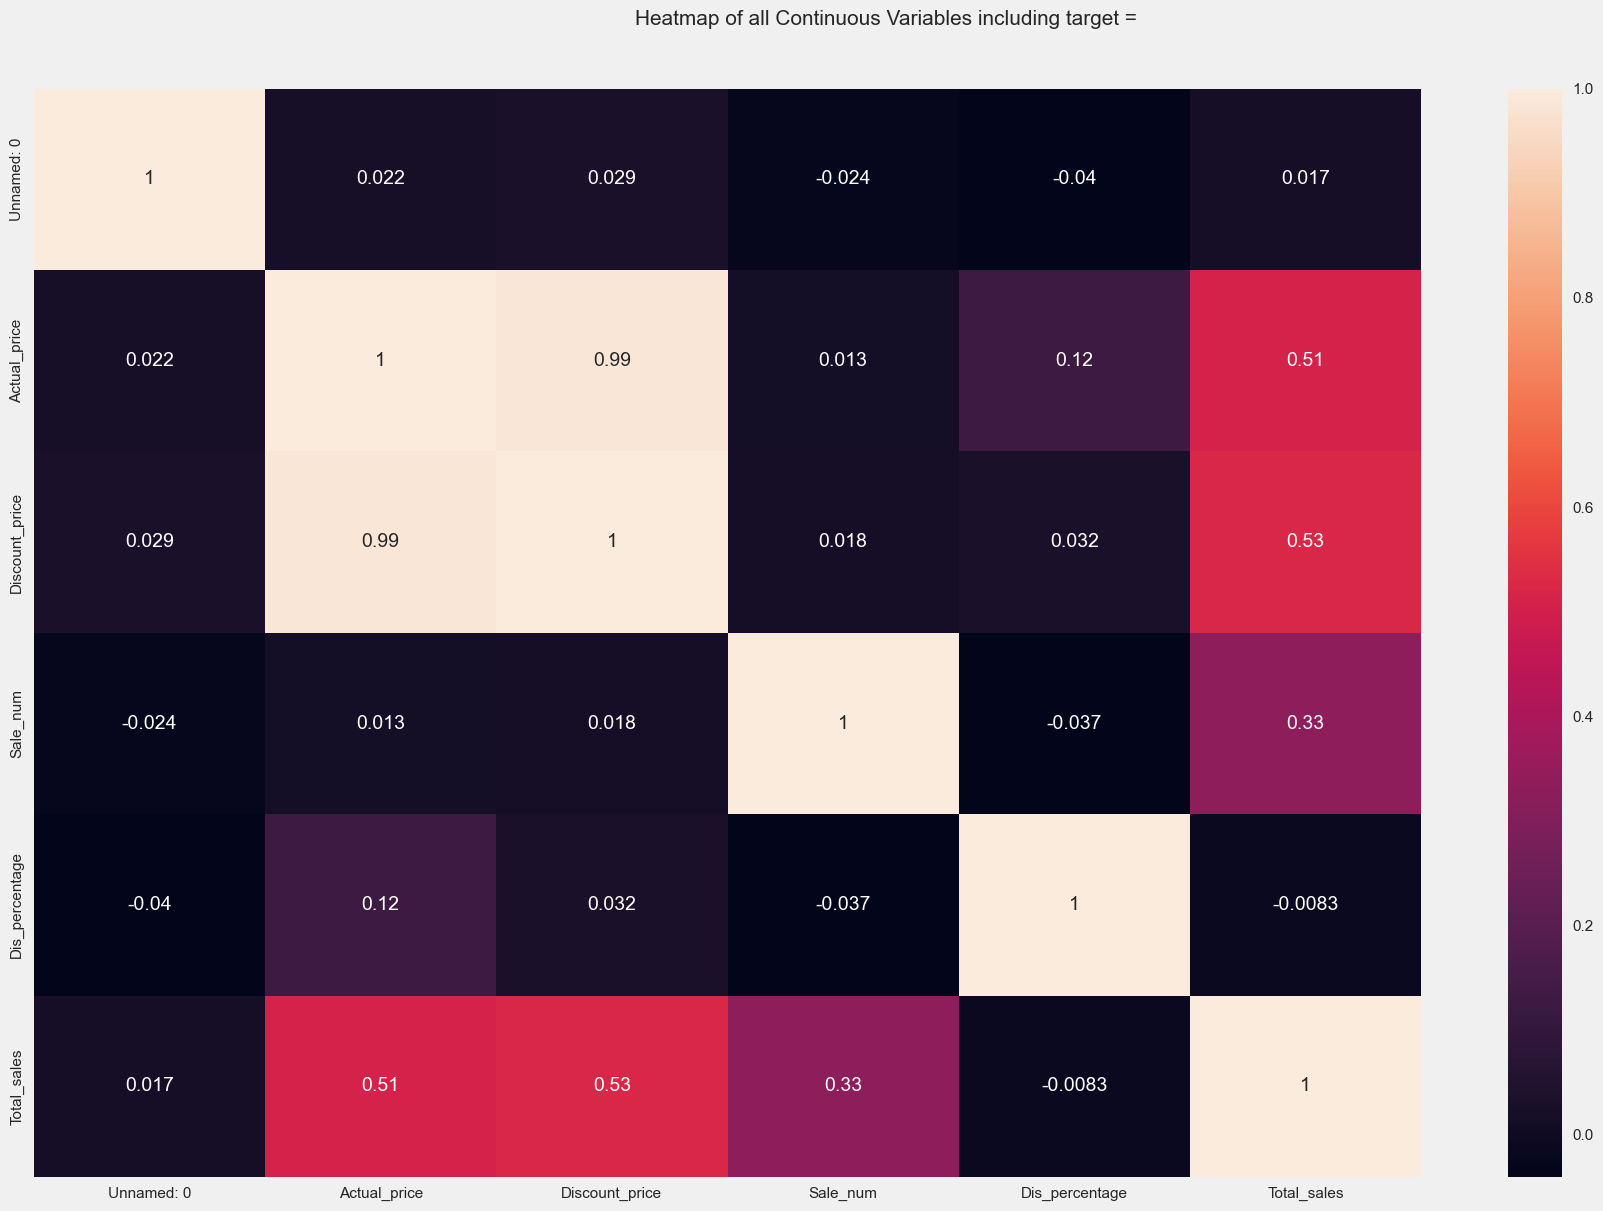

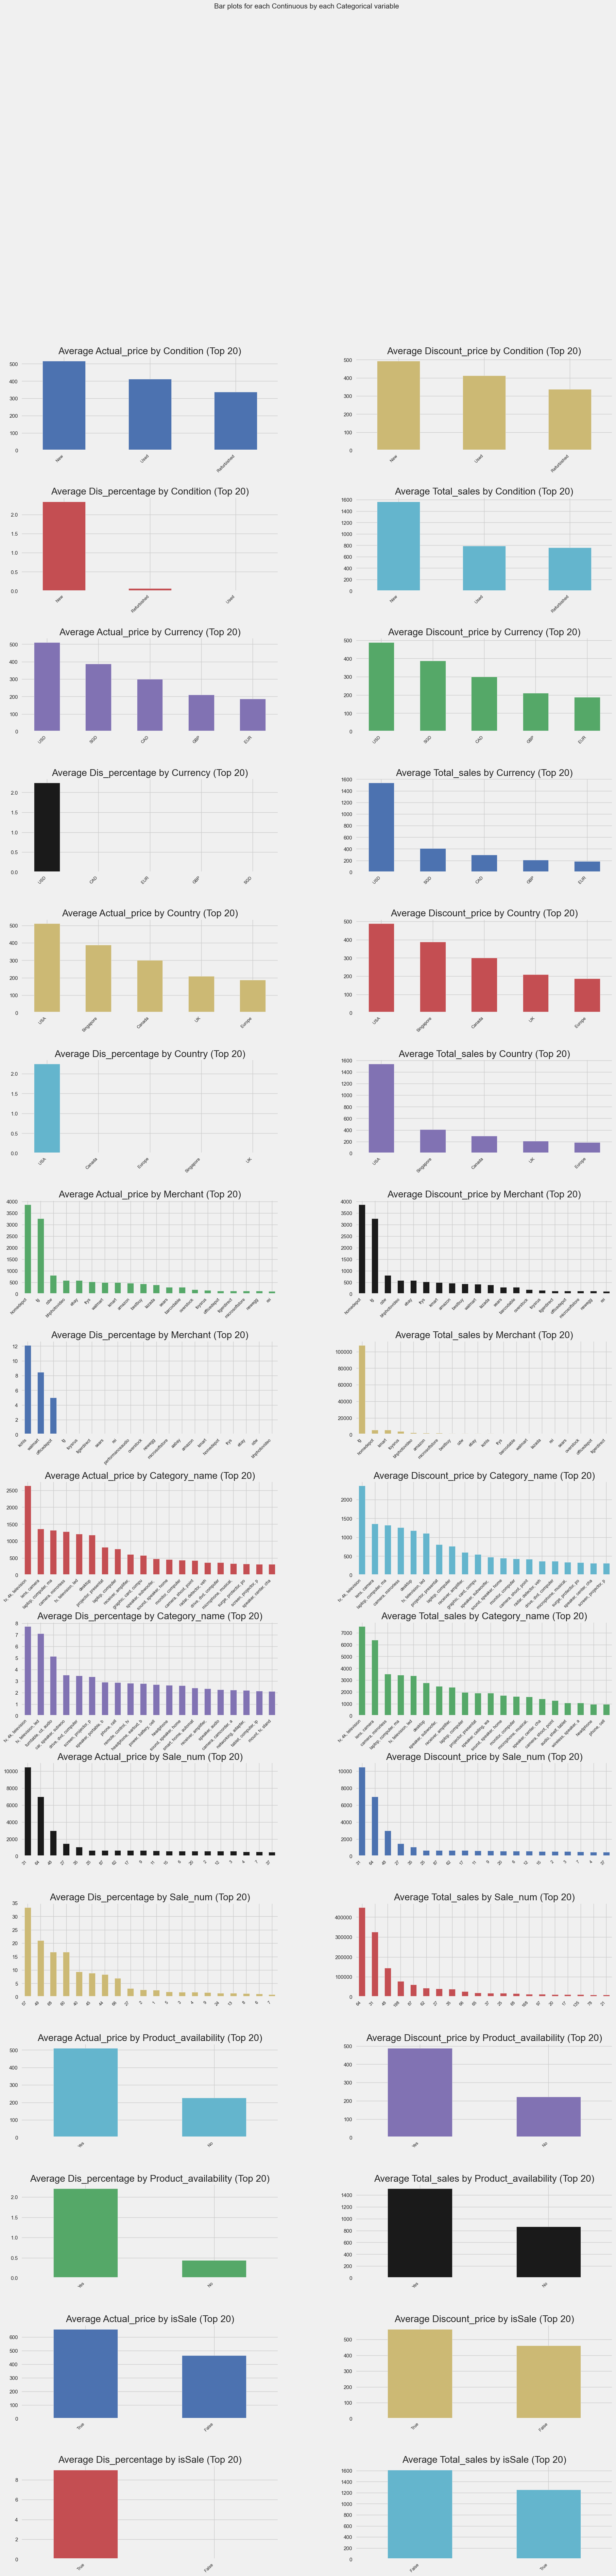

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\SkyLake\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\SkyLake\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\SkyLake\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\SkyLake\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\SkyLake\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nlt

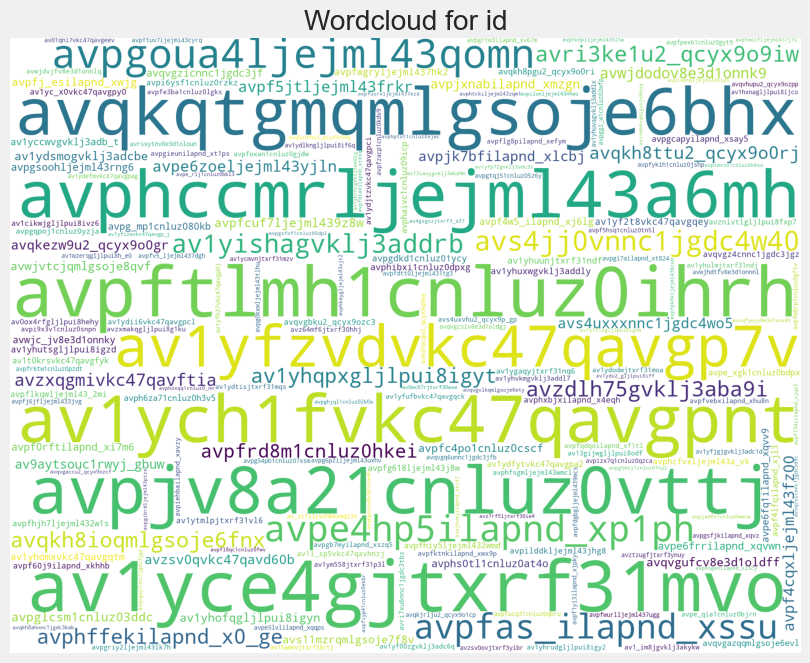

Could not draw wordcloud plot for Date


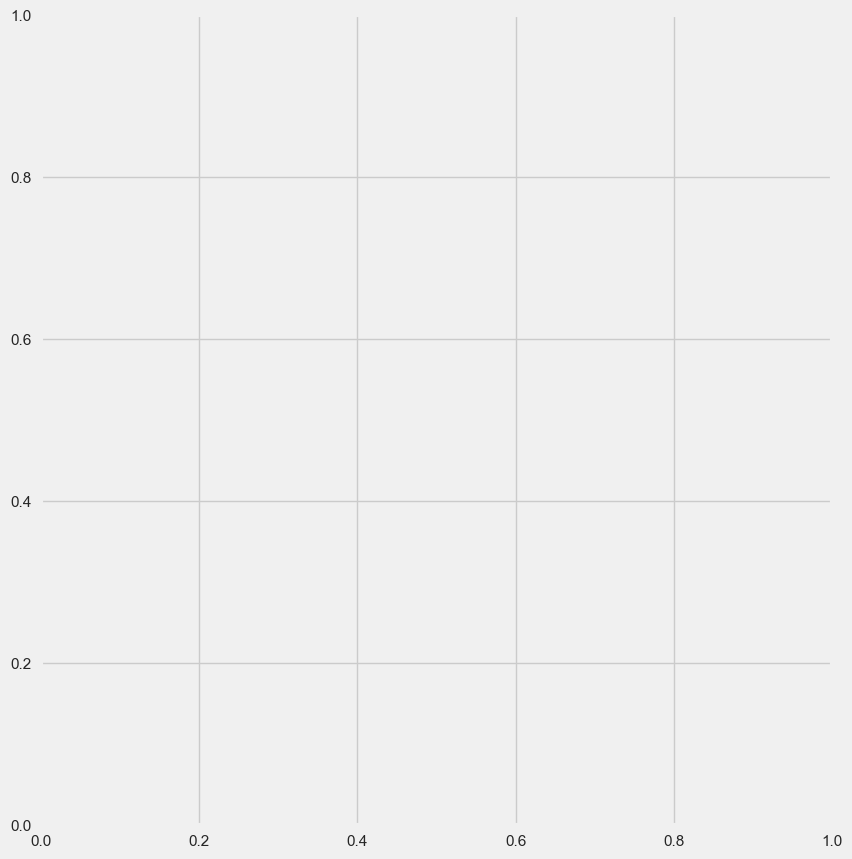

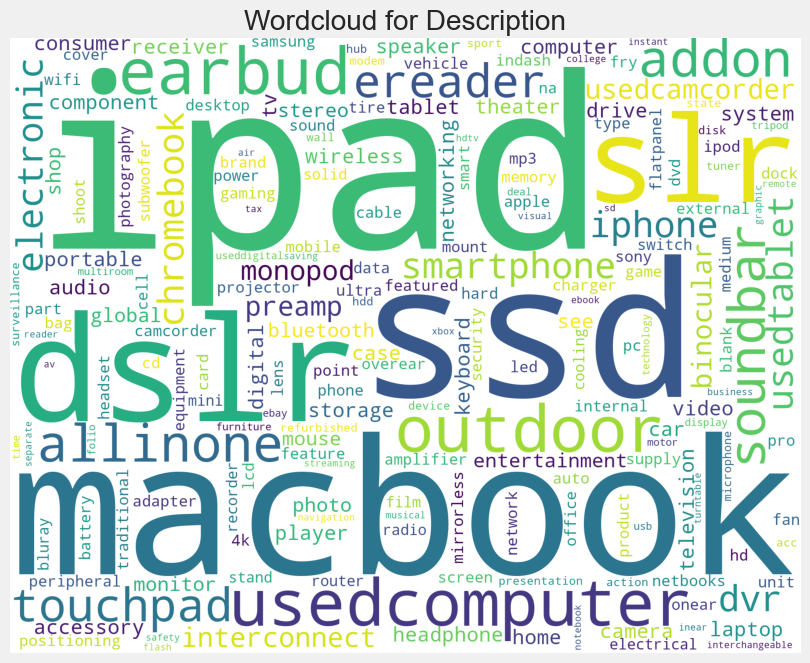

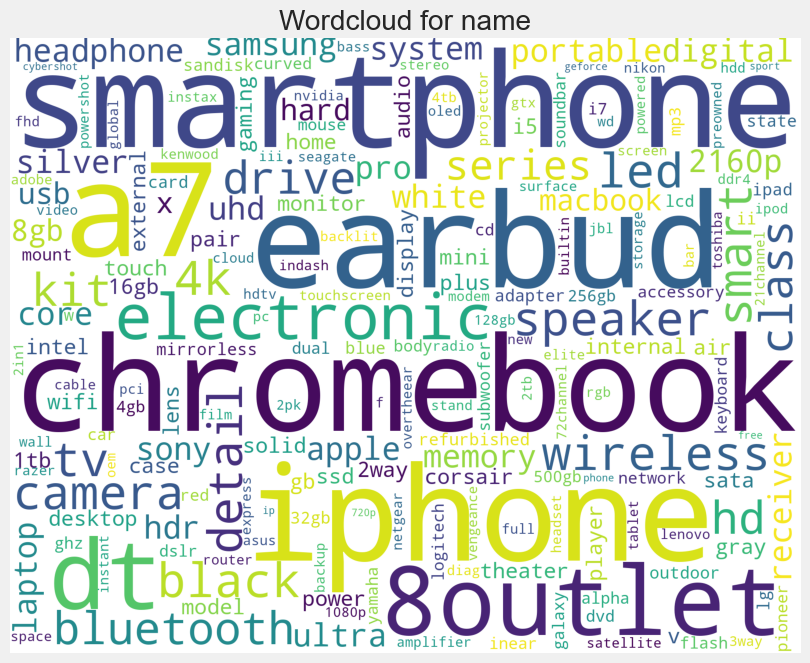

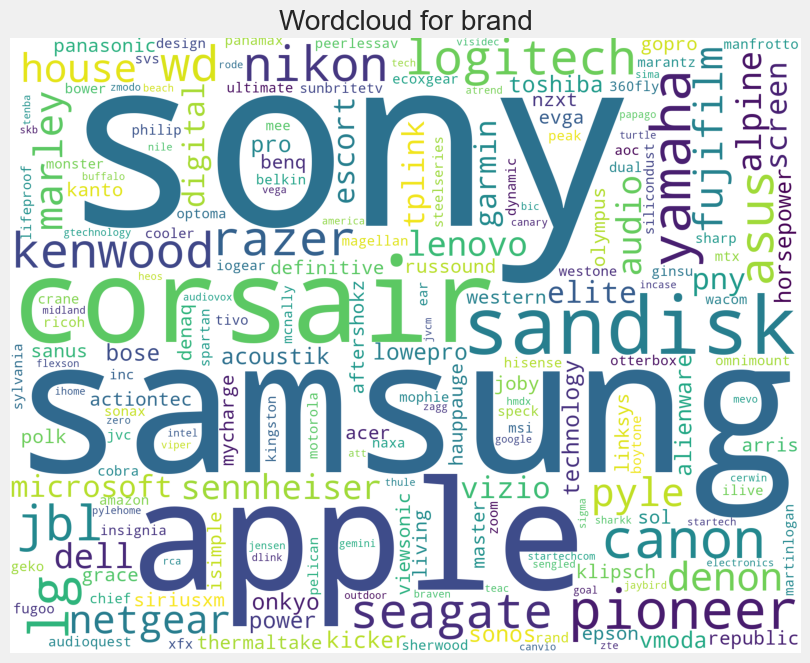

All Plots done
Time to run AutoViz = 64 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [29]:
#importing Autoviz 
from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
%matplotlib inline
AV = AutoViz_Class()
dfc = AV.AutoViz('CleanedData.csv')